<a href="https://www.kaggle.com/code/roshan26/customer-churn-prediction?scriptVersionId=106416910" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Libraries:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

In [2]:
df = pd.read_csv('../input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [3]:
pd.set_option('display.max_columns',None)
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.shape

(7043, 21)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


# Exploratory Data Analysis

In [6]:
for i in df.columns:
    print(f"Unique {i}'s count: {df[i].nunique()}")
    print(f"{df[i].unique()}\n")

Unique customerID's count: 7043
['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']

Unique gender's count: 2
['Female' 'Male']

Unique SeniorCitizen's count: 2
[0 1]

Unique Partner's count: 2
['Yes' 'No']

Unique Dependents's count: 2
['No' 'Yes']

Unique tenure's count: 73
[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]

Unique PhoneService's count: 2
['No' 'Yes']

Unique MultipleLines's count: 3
['No phone service' 'No' 'Yes']

Unique InternetService's count: 3
['DSL' 'Fiber optic' 'No']

Unique OnlineSecurity's count: 3
['No' 'Yes' 'No internet service']

Unique OnlineBackup's count: 3
['Yes' 'No' 'No internet service']

Unique DeviceProtection's count: 3
['No' 'Yes' 'No internet service']

Unique TechSupport's count: 3
['No' 'Yes' 'No internet service']

Unique StreamingTV's

In [7]:
df.describe(include=['object']).T

,count,unique,top,freq
customerID,7043,7043,7590-VHVEG,1
gender,7043,2,Male,3555
Partner,7043,2,No,3641
Dependents,7043,2,No,4933
PhoneService,7043,2,Yes,6361
MultipleLines,7043,3,No,3390
InternetService,7043,3,Fiber optic,3096
OnlineSecurity,7043,3,No,3498
OnlineBackup,7043,3,No,3088
DeviceProtection,7043,3,No,3095


# Data Wrangling

In [8]:
df_copy = df.copy()

### Total Charges:

Earlier we noticed that the data type of TotalCharges column was object, whereas it should have been numeric.

In [9]:
df.TotalCharges = pd.to_numeric(df.TotalCharges, errors='coerce')
df.isna().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [10]:
df.drop(labels=df[df['tenure'] == 0].index, axis=0, inplace=True)

In [11]:
df.drop(columns=['customerID'],axis=1,inplace=True)

# EDA & Visualization:

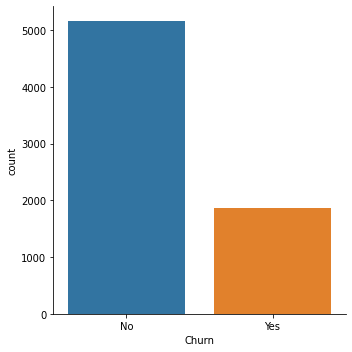

In [12]:
sns.catplot(x="Churn", kind="count", data=df)
plt.show()

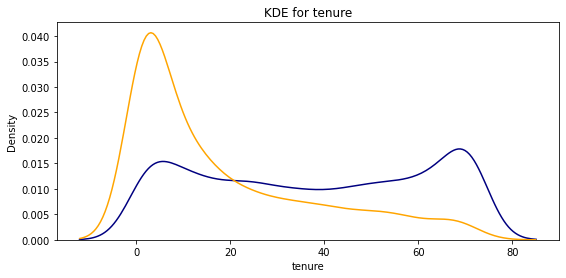

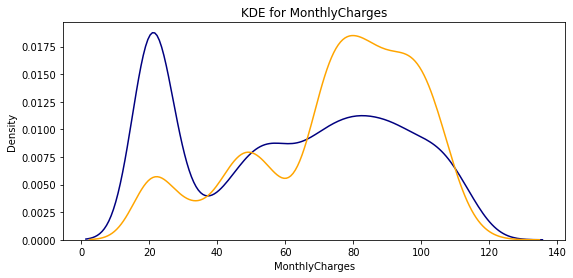

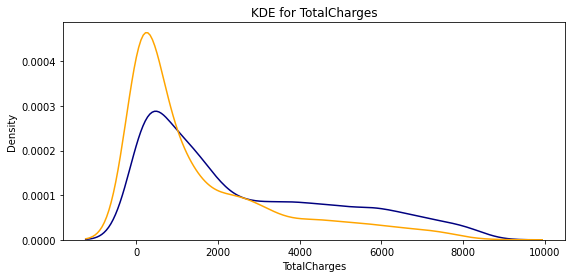

In [13]:
def kdeplot(feature):
    plt.figure(figsize=(9, 4))
    plt.title("KDE for {}".format(feature))
    ax0 = sns.kdeplot(df[df['Churn'] == 'No'][feature].dropna(), color= 'navy', label= 'Churn: No')
    ax1 = sns.kdeplot(df[df['Churn'] == 'Yes'][feature].dropna(), color= 'orange', label= 'Churn: Yes')
kdeplot('tenure')
kdeplot('MonthlyCharges')
kdeplot('TotalCharges')

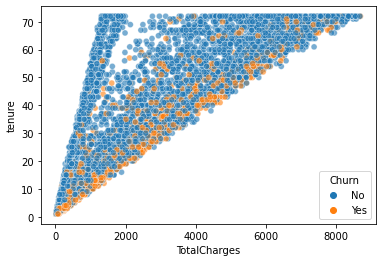

In [14]:
ax0 = sns.scatterplot(data=df,x='TotalCharges',y='tenure',hue='Churn',alpha=0.6)
plt.show()

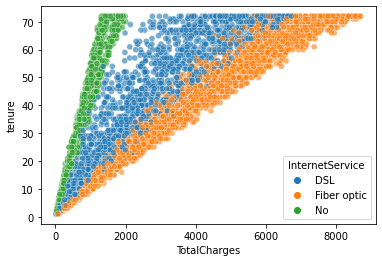

In [15]:
sns.scatterplot(data=df,x='TotalCharges',y='tenure',hue='InternetService',alpha=0.6)
plt.show()

# Encoding

In [16]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### Dealing with Binary Variables:

In [17]:
df['Churn'].replace(to_replace='Yes', value=1, inplace=True)
df['Churn'].replace(to_replace='No',  value=0, inplace=True)

df['gender'] = df['gender'].map({'Female':0,'Male':1})
df['Partner'] = df['Partner'].map({'No':0,'Yes':1})
df['PhoneService'] = df['PhoneService'].map({'No':0,'Yes':1})
df['Dependents'] = df['Dependents'].map({'No':0,'Yes':1})
df['PaperlessBilling'] = df['PaperlessBilling'].map({'No':0,'Yes':1})

### Dealing with Ordinal Variables:

In [18]:
def tenure_split(df):
    if df['tenure'] <= 12:
        return(0)
    elif (df['tenure'] > 12) & (df['tenure'] <= 24):
        return(1)
    elif (df['tenure'] > 24) & (df['tenure'] <= 36):
        return(2)
    elif (df['tenure'] > 36) & (df['tenure'] <= 48):
        return(3)
    elif (df['tenure'] > 48) & (df['tenure'] <= 60):
        return(4)
    elif df['tenure'] > 60:
        return(5)
    
df['tenure_group'] = df.apply(lambda df:tenure_split(df),axis=1)

In [19]:
df.drop(columns=['tenure'],axis=1,inplace=True)

In [20]:
# Contract
df['Contract'] = df['Contract'].map({'Month-to-month':0,'One year':1,'Two year':2})

### Dealing with Nominal Variables:

In [21]:
pd.set_option('display.max_columns', None)
df = pd.get_dummies(df,columns = ['MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection',
                            'TechSupport','StreamingTV','StreamingMovies','PaymentMethod'])

In [22]:
df.head(2)

,gender,SeniorCitizen,Partner,Dependents,PhoneService,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,tenure_group,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,0,0,1,29.85,29.85,0,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0
1,1,0,0,0,1,1,0,56.95,1889.50,0,2,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,0,0,1


In [23]:
y = df['Churn'].values
x = df.drop(columns='Churn')

In [24]:
features = x.columns.values
scaler = MinMaxScaler(feature_range=(0,1))
scaler.fit(x)
x = pd.DataFrame(scaler.transform(x))
x.columns = features
x

,gender,SeniorCitizen,Partner,Dependents,PhoneService,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,tenure_group,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.115423,0.001275,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1.0,0.0,0.0,0.0,1.0,0.5,0.0,0.385075,0.215867,0.4,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.354229,0.010310,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1.0,0.0,0.0,0.0,0.0,0.5,0.0,0.239303,0.210241,0.6,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.521891,0.015330,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,1.0,0.0,1.0,1.0,1.0,0.5,1.0,0.662189,0.227521,0.2,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
7028,0.0,0.0,1.0,1.0,1.0,0.5,1.0,0.845274,0.847461,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
7029,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.112935,0.037809,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
7030,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.558706,0.033210,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


# Prediction Using Logistic Regression & Random Forest Algorithm:

In [25]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.1,random_state=42)

In [26]:
x.shape,y.shape

((7032, 38), (7032,))

In [27]:
model = RandomForestClassifier(n_estimators=500)
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
metrics.accuracy_score(y_test,y_pred)

0.7840909090909091

In [28]:
print(metrics.confusion_matrix(y_test,y_pred))
print(metrics.classification_report(y_test,y_pred))

[[459  52]
 [100  93]]
              precision    recall  f1-score   support

           0       0.82      0.90      0.86       511
           1       0.64      0.48      0.55       193

    accuracy                           0.78       704
   macro avg       0.73      0.69      0.70       704
weighted avg       0.77      0.78      0.77       704



In [29]:
model = LogisticRegression()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
metrics.accuracy_score(y_test,y_pred)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


0.7826704545454546

In [30]:
print(metrics.confusion_matrix(y_test,y_pred))
print(metrics.classification_report(y_test,y_pred))

[[455  56]
 [ 97  96]]
              precision    recall  f1-score   support

           0       0.82      0.89      0.86       511
           1       0.63      0.50      0.56       193

    accuracy                           0.78       704
   macro avg       0.73      0.69      0.71       704
weighted avg       0.77      0.78      0.77       704

